# **Natural Language Processing(NLP): Sentiment Analysis**


## **Project Scope: Sentiment analysis on IMDB using TensorFlow and PyTorch.**


**Key Steps:**

1. Preprocess the dataset (tokenization, padding).
2. Model design (LSTM, GRU, or Transformer).
3. Fine-tune pre-trained embeddings (e.g., GloVe).
4. Deploy model as an API.


<a id='libraries'></a>
# Main libraries
We start by importing the main libraires that we will use:

- the [re](https://docs.python.org/3/library/re.html) module (for regular expression matching operations)
- the [nltk](https://www.nltk.org/) toolkit (for natural language operations)
- the [random](https://docs.python.org/3/library/random.html) module (for random number generation)
- the [numpy](https://numpy.org/) library (for arrays operations)
- the [pandas](https://pandas.pydata.org/) library (for data analysis)
- the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module (for statistics)
- the [seaborn](https://seaborn.pydata.org/) library (for statistical data visualization)
- the [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) interface (for MATLAB-like plots)

We also download (if not already done) the stopwords and punkt [data packages](https://www.nltk.org/data.html) from the nltk toolkit.

In [ ]:
import re
import nltk
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Setting as large the xtick and ytick font sizes in graphs

plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<a id='IMDB'></a>
## **Loading the IMDB dataset**
We retrieve from [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download) the csv file "IMDB Dataset.csv" consisting of 50'000 IMDB movies and TV shows reviews with their positive or negative sentiment classification.

In [ ]:
# Storing the csv file into a DataFrame "df"

df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Print the basic properties of the DataFrame and verify the presence of null values in the DataFrame.

df.shape: (50000, 2)
df.columns: Index(['review', 'sentiment'], dtype='object') 

df.sentiment.value_counts():
sentiment
positive    25000
negative    25000
Name: count, dtype: int64 



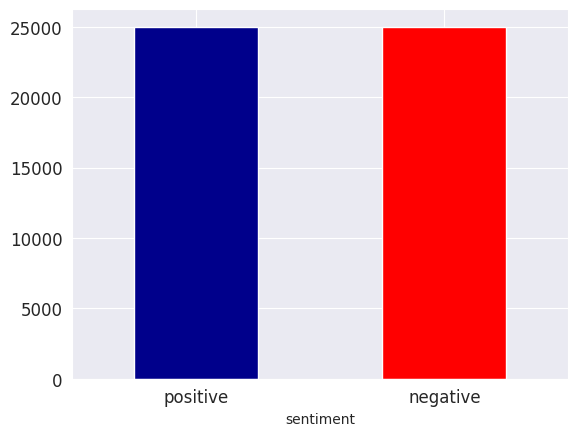

df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print('\033[1m' + 'df.shape:' + '\033[0m', df.shape)
print('\033[1m' + 'df.columns:' + '\033[0m', df.columns, '\n')
print('\033[1m' + 'df.sentiment.value_counts():' + '\033[0m')
print(df.sentiment.value_counts(), '\n')

with sns.axes_style("darkgrid"):
    df['sentiment'].value_counts().plot.bar(color=['darkblue', 'r'], rot=0, fontsize='large')
    plt.show()

print('\033[1m' + 'df.info:' + '\033[0m')
df.info()

* From the Chart and the informations above, we are sure that the reviews counts are equally distributed, i.e. the number of positive and the number of negative reviews are equal

* The Datasets appears to be free from missing values or nulls and the data types format for the columns are correctly formatted

In [ ]:
# encode the sentiment column by setting possitive = 1 and negative = 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<a id='preprocessing'></a>
# Data Cleaning and preprocessing
use regular expressions to make the following transformations to the reviews:

- remove punctuation marks
- remove HTML tags
- remove URL's
- remove characters which are not letters or digits
- remove successive whitespaces
- convert the text to lower case
- strip whitespaces from the beginning and the end of the reviews

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text

In [ ]:
# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


## **Building LOgistic Regression Model**

Importing Necessary Liberary to train a logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Splitting the data into training and test sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# Make predictions
lr_pred = lr_model.predict(X_test_tfidf)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_pred))


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### **Model Performance Insights**

## Key Metrics
- **Accuracy:** 0.88
  - **Macro Average:** Precision = 0.88, Recall = 0.88, F1-Score = 0.88
  - **Weighted Average:** Precision = 0.88, Recall = 0.88, F1-Score = 0.88

## Insights
1. The model demonstrates balanced performance across both classes, with slightly higher recall for Class 1.
2. Precision and recall are consistent, leading to an F1-score of 0.88 for Class 0 and 0.89 for Class 1.
3. The overall accuracy and average metrics indicate a robust and reliable classification model.

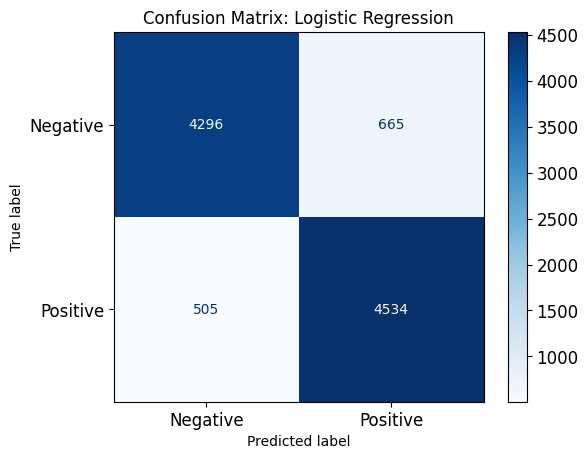

In [ ]:
# Generate confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)

# Plot the confusion matrix
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['Negative', 'Positive'])
lr_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


## Insights
1. High recall for Class 1 (**0.90**) indicates effective identification of positives.
2. Balanced performance with minimal False Negatives (505) and False Positives (665).
3. Overall robust classification with consistent metrics across both classes.


## **Naive Bayes Model**
A simpler and faster model for text data.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predictions
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")


Naive Bayes Accuracy: 0.85


The Naive bayes Accuracy score is 85%, meaning the model was able to predict only 85 percent of the sentiments accurately and failed in the remaining 15% percent. the model is good but still less accurate than the logistic regression

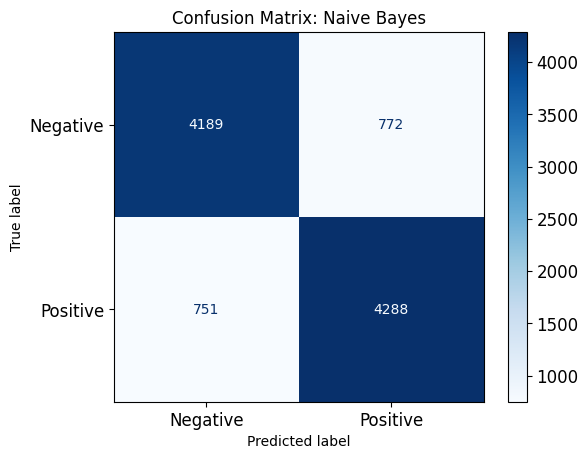

In [ ]:
# Generate confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_pred)

# Plot the confusion matrix
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=['Negative', 'Positive'])
nb_disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Naive Bayes")
plt.show()


### **Support Vector Machine (SVM)**
This model can be a great powerful classifier for text data.

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
# Train an SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)


LinearSVC()

In [ ]:
# Predictions
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


SVM Accuracy: 0.87


In [ ]:
# Generate confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)

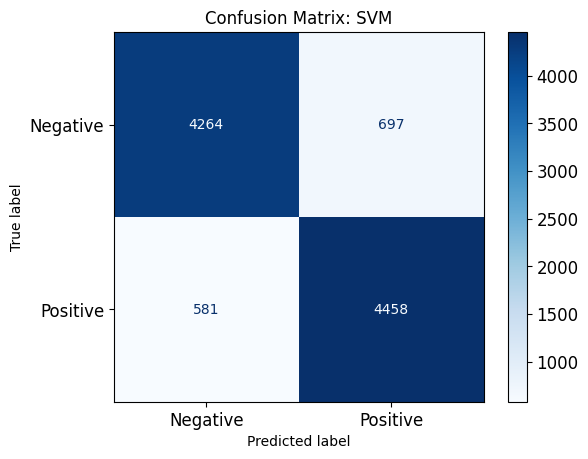

In [ ]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: SVM")
plt.show()

The performsnce of the Support Vector machine was also impressive, with an accurace score of 0.87, although proves to be better than naive Bayes Model but slightly less accurate than the logistic regression model

## **Random Forest Model**
A robust ensemble-based approach.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
rf_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.85


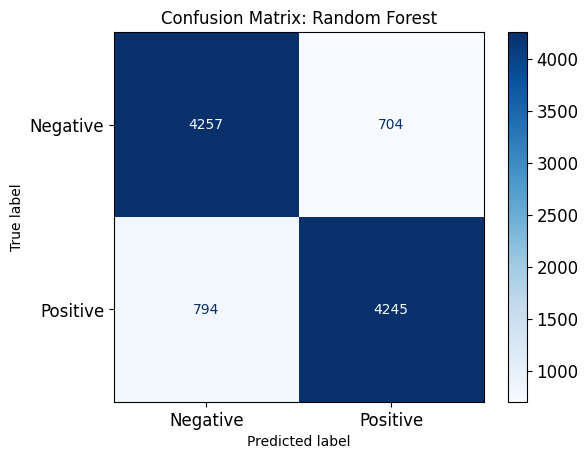

In [ ]:
# Generate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest")
plt.show()


## **LSTM Model**
LSTM is well-suited for sequential data like text. Here is the implementation:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenize the text for LSTM
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [ ]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 238ms/step - accuracy: 0.5181 - loss: 0.6938 - val_accuracy: 0.5018 - val_loss: 0.6920
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 239ms/step - accuracy: 0.5720 - loss: 0.6669 - val_accuracy: 0.5072 - val_loss: 0.6898
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - accuracy: 0.5142 - loss: 0.6895 - val_accuracy: 0.5097 - val_loss: 0.6856
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.5462 - loss: 0.6809 - val_accuracy: 0.5081 - val_loss: 0.6924
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.5221 - loss: 0.6905 - val_accuracy: 0.5833 - val_loss: 0.6772


In [ ]:
# Evaluate the model
lstm_pred = (lstm_model.predict(X_test) > 0.5).astype("int32")
lstm_accuracy = accuracy_score(y_test, lstm_pred)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step
LSTM Accuracy: 0.58


## **Comparison of Models performance and accuracies**
After training all models, their accuracies can be compared:

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Logistic Regression Accuracy: 0.88
LSTM Accuracy: 0.58
Naive Bayes Accuracy: 0.85
SVM Accuracy: 0.87
Random Forest Accuracy: 0.85


From the above summary of accuracy scores for all the models trained, Logistic Regression Proves to be the most accurate of them all

## **Hyper Parameter Tuning of the Logistic Regression Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' requires solver to be 'liblinear' or 'saga'
    'solver': ['liblinear', 'lbfgs', 'saga']
}


In [ ]:
# Create the logistic regression model
lr = LogisticRegression(max_iter=1000)

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.2f}")


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.88


## **Train Model Using the Best Parameters for the Logistic Regression**
After finding the best parameters, train the Logistic Regression model using them.

In [ ]:
# Train the best Logistic Regression model
best_lr_model = LogisticRegression(**best_params, max_iter=1000)
best_lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(C=1, max_iter=1000)

In [ ]:
# Evaluate on the test set
y_pred_tuned = best_lr_model.predict(X_test_tfidf)

In [ ]:
# Accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Logistic Regression Accuracy: {tuned_accuracy:.2f}")

Tuned Logistic Regression Accuracy: 0.88


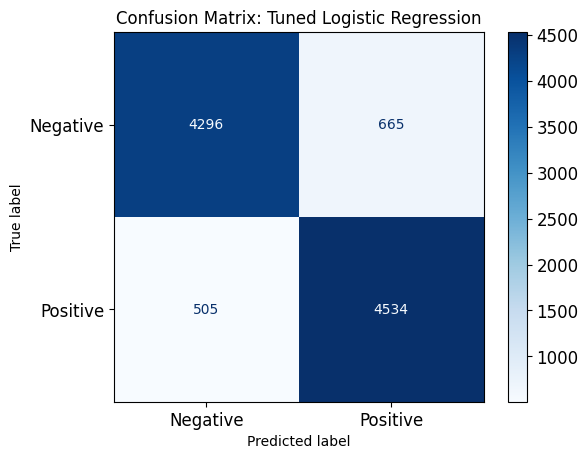

In [ ]:

tuned_cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=tuned_cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Tuned Logistic Regression")
plt.show()
